# InertialVibrationAnalysis

## 1 Description
This project is using for collect data from the ps5 controller and analyze the data to identify the status of the controller.
By using the inear resonant actuator with something certain signal and the inertial sensor to identify the status of the controller.

### 1.1 Data description


In [19]:
# read the csv file 
import pandas as pd

file_name="inertial_data_rule1.csv"
data=pd.read_csv(file_name)

# data description
data.head()

,time,acc_x,acc_y,acc_z,gyro_pitch,gyro_yaw,gyro_roll,vibration_status,label,person_id
0,2025-01-08 14:00:17.122636,5,3,9,-2540,7730,1259,0,0,0
1,2025-01-08 14:00:17.123878,5,3,9,-2540,7730,1259,0,0,0
2,2025-01-08 14:00:17.125141,3,2,6,-2543,7757,1242,0,0,0
3,2025-01-08 14:00:17.126386,3,2,6,-2543,7757,1242,0,0,0
4,2025-01-08 14:00:17.127642,3,2,6,-2543,7757,1242,0,0,0


| **Field**           | **Description**                                                                  |
|----------------------|----------------------------------------------------------------------------------|
| `time`              | Timestamp of the data reading. YYYY-MM-DD HH:MM:SS.SSSSSS                                               |
| `acc_x`             | Acceleration along the X-axis -32768 to 32767.                                           |
| `acc_y`             | Acceleration along the Y-axis -32768 to 32767.                                           |
| `acc_z`             | Acceleration along the Z-axis -32768 to 32767.                                           |
| `gyro_pitch`        | Gyroscope reading for pitch -32768 to 32767.               |
| `gyro_yaw`          | Gyroscope reading for yaw -32768 to 32767.                 |
| `gyro_roll`         | Gyroscope reading for roll -32768 to 32767.                |
| `vibration_status`  | Indicates the vibration pattern:                                                |
|                      | - `0`: No vibration                                                            |
|                      | - `1`: Vibration type 1, half intensity, 128 intensity                                                        |
|                      | - `2`: Vibration type 2, full intensity, 255 intensity                                                        |
|                      | - `3`: Vibration type 3, 1hz sin wave, 0 to 255 intensity                                                        |
|                      | - `4`: Vibration type 4, low intensity, 10 intensity                                                        |
|                      | - `8`: Vibration type 8, minimum intensity, 1 intensity                                                        |
| `label`             | Label indicating the status:                                                   |
|                      | - `0`: On table                                                               |
|                      | - `1`: In hand                                                               |
| `person_id`         | Identifier for the person providing the data:                                   |
|                      | - `0`: Person 1                                                              |
|                      | - `1`: Person 2                                                              |
|                      | - `2`: Person 3                                                              |
|                      | - `3`: Person 4                                                              |


### 1.2 Data collection rule


| **Parameter**        | **Description**                                                                                       |
|-----------------------|-------------------------------------------------------------------------------------------------------|
| `rule_name`          | **rule1**: The name of the rule.                                                                      |
| `category_rows`      | **1000 rows** per vibration status and label:                                                        |
|                      | - Data collection includes **1000 rows** for each combination of vibration pattern and label.        |
|                      | - Example:                                                                                           |
|                      |   - **On Table**, Pattern 1: 1000 rows                                                               |
|                      |   - **In Hand**, Pattern 1: 1000 rows                                                                |
|                      |   - Repeated for each vibration pattern and label combination.                                       |
| `session_rows`       | **50 rows**: For SVM model, the data is divided into sessions with 50 rows in each category.         |
| `polling_interval`   | **1ms (1000Hz)**: The data polling interval, capturing data every millisecond.                       |
| **Sampling Rate**    | **250Hz**: The actual sampling rate of the controller, limited by the HID API.                       |
|                      | - Even though data is polled at 1000Hz, new sensor readings are available only every 4ms (250Hz).    |
| **Additional Notes** | - The rule ensures sufficient data is collected for each label and vibration pattern.                |
|                      | - Use interpolation or aggregation to align the polled data rate (1000Hz) with the actual sampling rate (250Hz). |


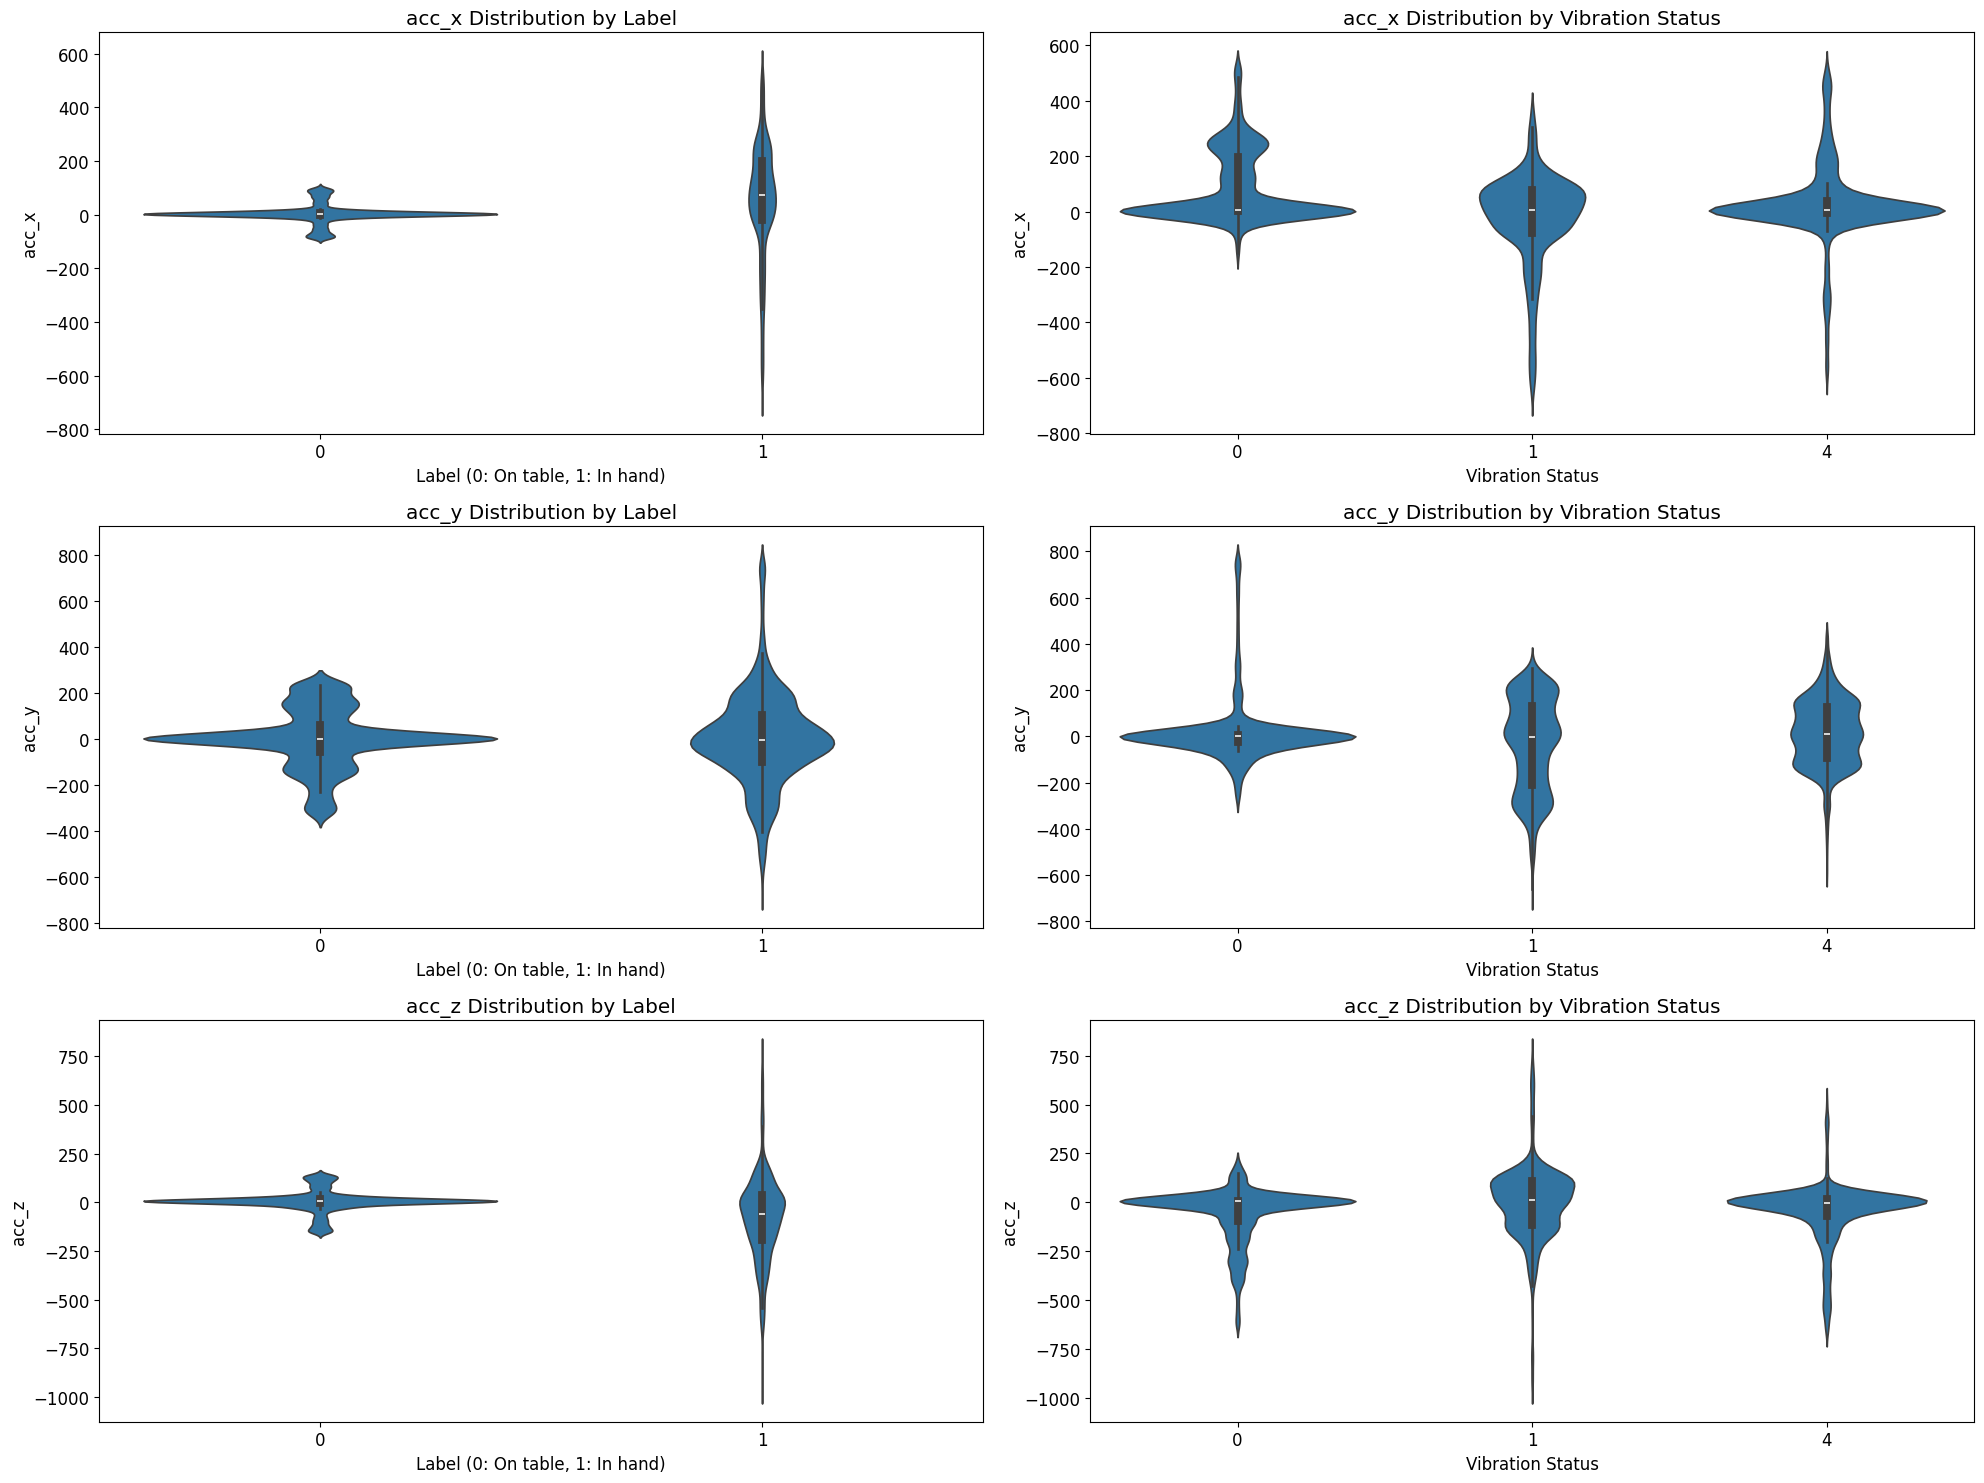

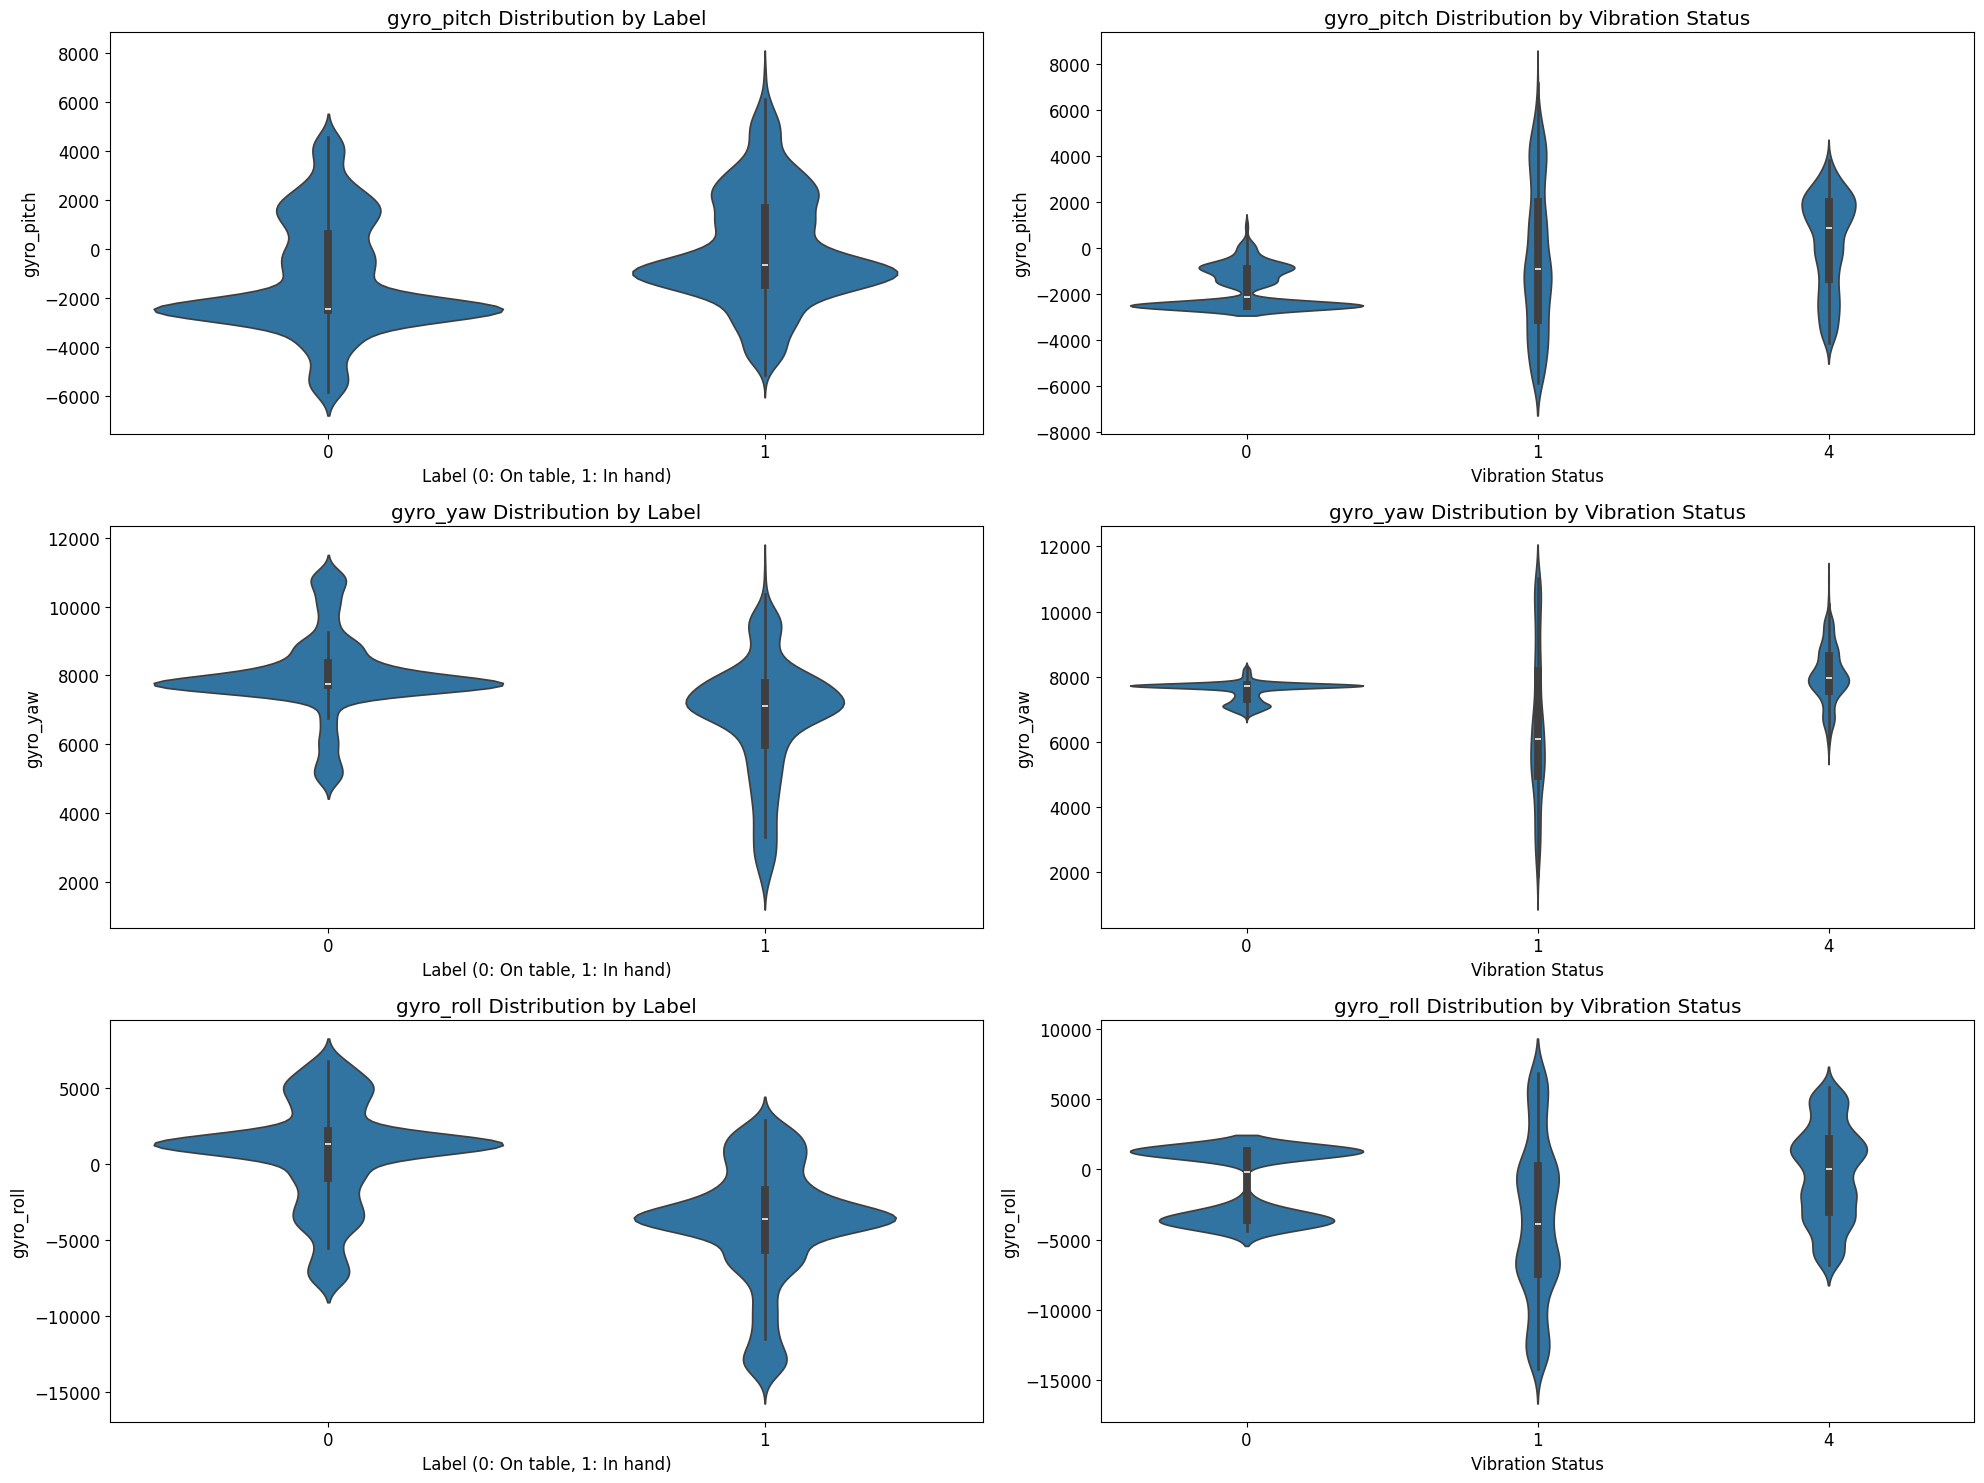


Basic Statistics:

Label Distribution:
label
0    3000
1    3000
Name: count, dtype: int64

Vibration Status Distribution:
vibration_status
0    2000
1    2000
4    2000
Name: count, dtype: int64


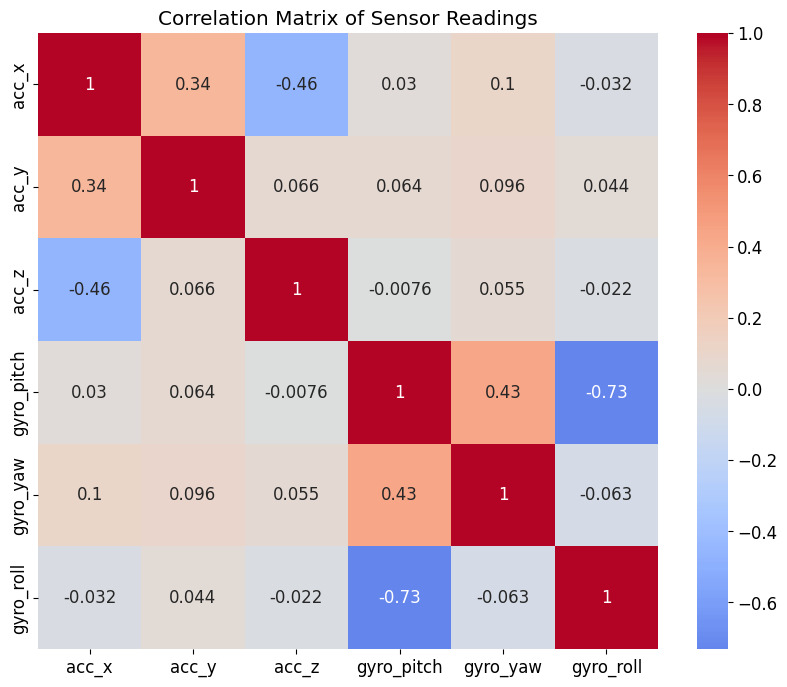

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a built-in style instead of seaborn
plt.style.use('default')

# Set figure size and font size for better readability
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 12

# Create violin plots for acceleration data vs label and vibration status
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Acceleration data
acc_fields = ['acc_x', 'acc_y', 'acc_z']
for i, field in enumerate(acc_fields):
    # Plot vs label
    plt.subplot(3, 2, i*2+1)
    sns.violinplot(data=data, x='label', y=field)
    plt.title(f'{field} Distribution by Label')
    plt.xlabel('Label (0: On table, 1: In hand)')
    plt.ylabel(field)
    
    # Plot vs vibration status
    plt.subplot(3, 2, i*2+2)
    sns.violinplot(data=data, x='vibration_status', y=field)
    plt.title(f'{field} Distribution by Vibration Status')
    plt.xlabel('Vibration Status')
    plt.ylabel(field)

plt.tight_layout()
plt.show()

# Create violin plots for gyroscope data vs label and vibration status
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# Gyroscope data
gyro_fields = ['gyro_pitch', 'gyro_yaw', 'gyro_roll']
for i, field in enumerate(gyro_fields):
    # Plot vs label
    plt.subplot(3, 2, i*2+1)
    sns.violinplot(data=data, x='label', y=field)
    plt.title(f'{field} Distribution by Label')
    plt.xlabel('Label (0: On table, 1: In hand)')
    plt.ylabel(field)
    
    # Plot vs vibration status
    plt.subplot(3, 2, i*2+2)
    sns.violinplot(data=data, x='vibration_status', y=field)
    plt.title(f'{field} Distribution by Vibration Status')
    plt.xlabel('Vibration Status')
    plt.ylabel(field)

plt.tight_layout()
plt.show()

# Print basic statistics
print("\nBasic Statistics:")
print("\nLabel Distribution:")
print(data['label'].value_counts())

print("\nVibration Status Distribution:")
print(data['vibration_status'].value_counts())

# Correlation matrix
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']
correlation = data[sensor_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sensor Readings')
plt.show()

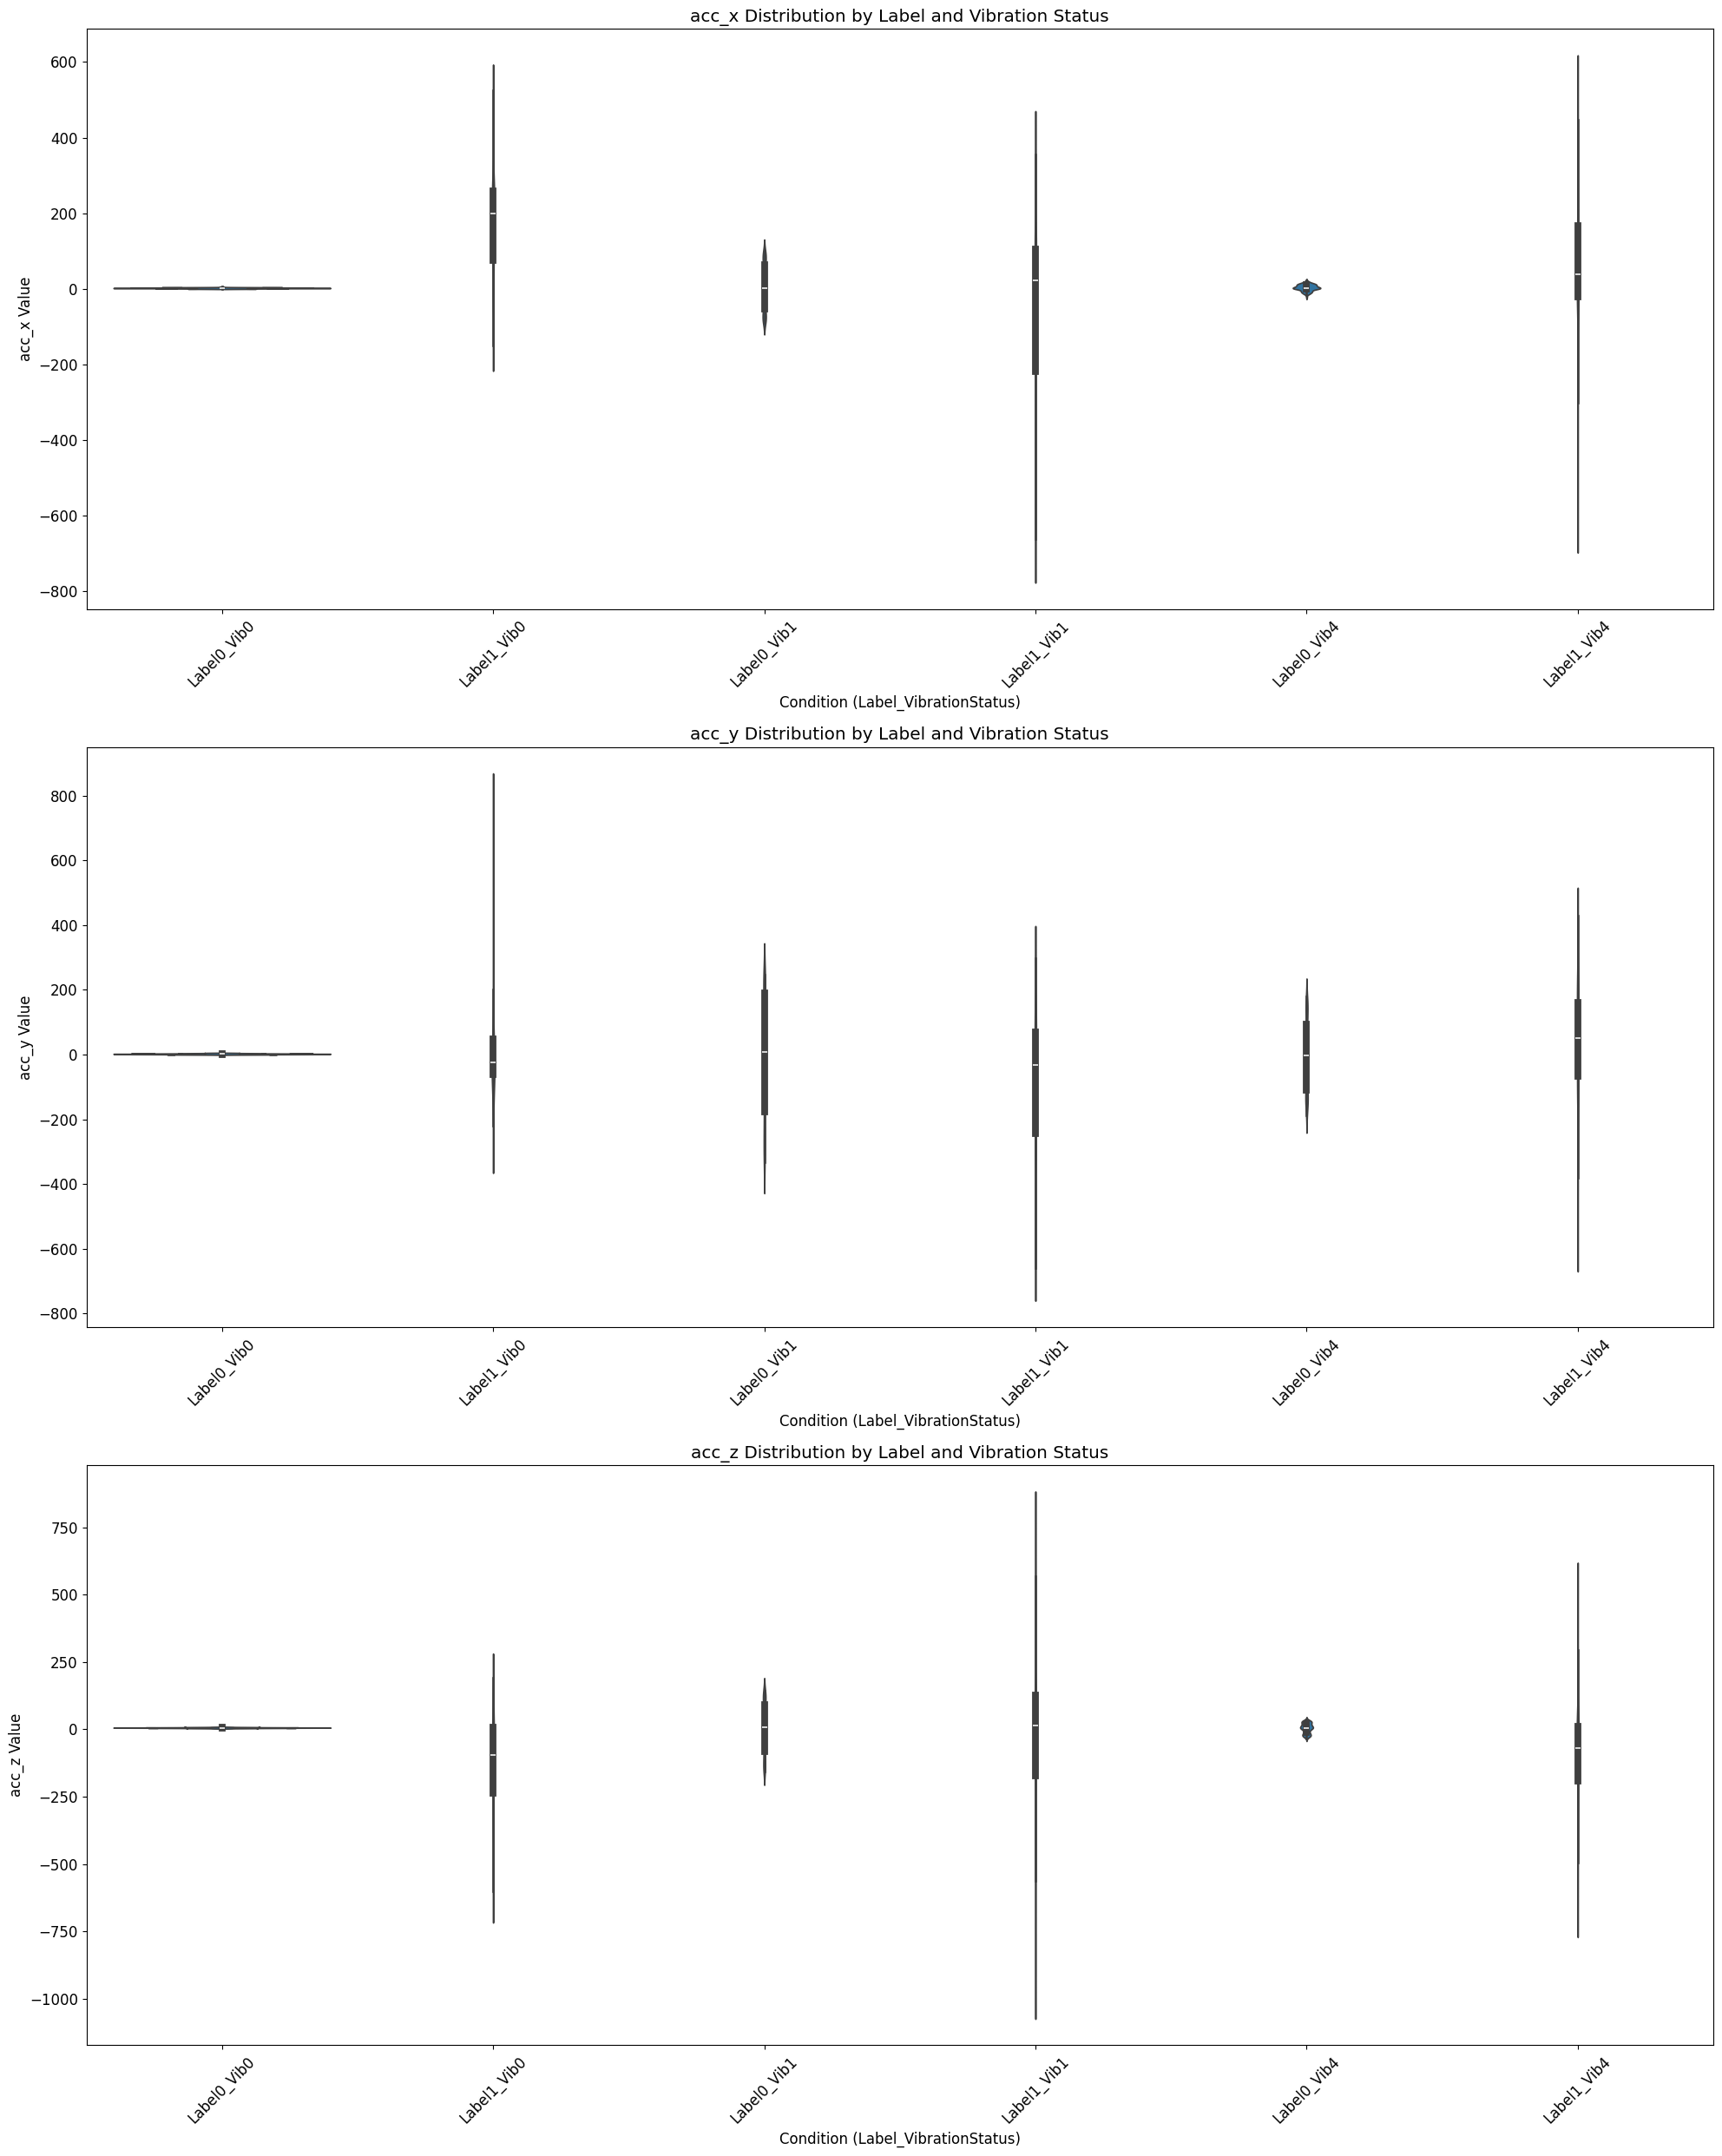

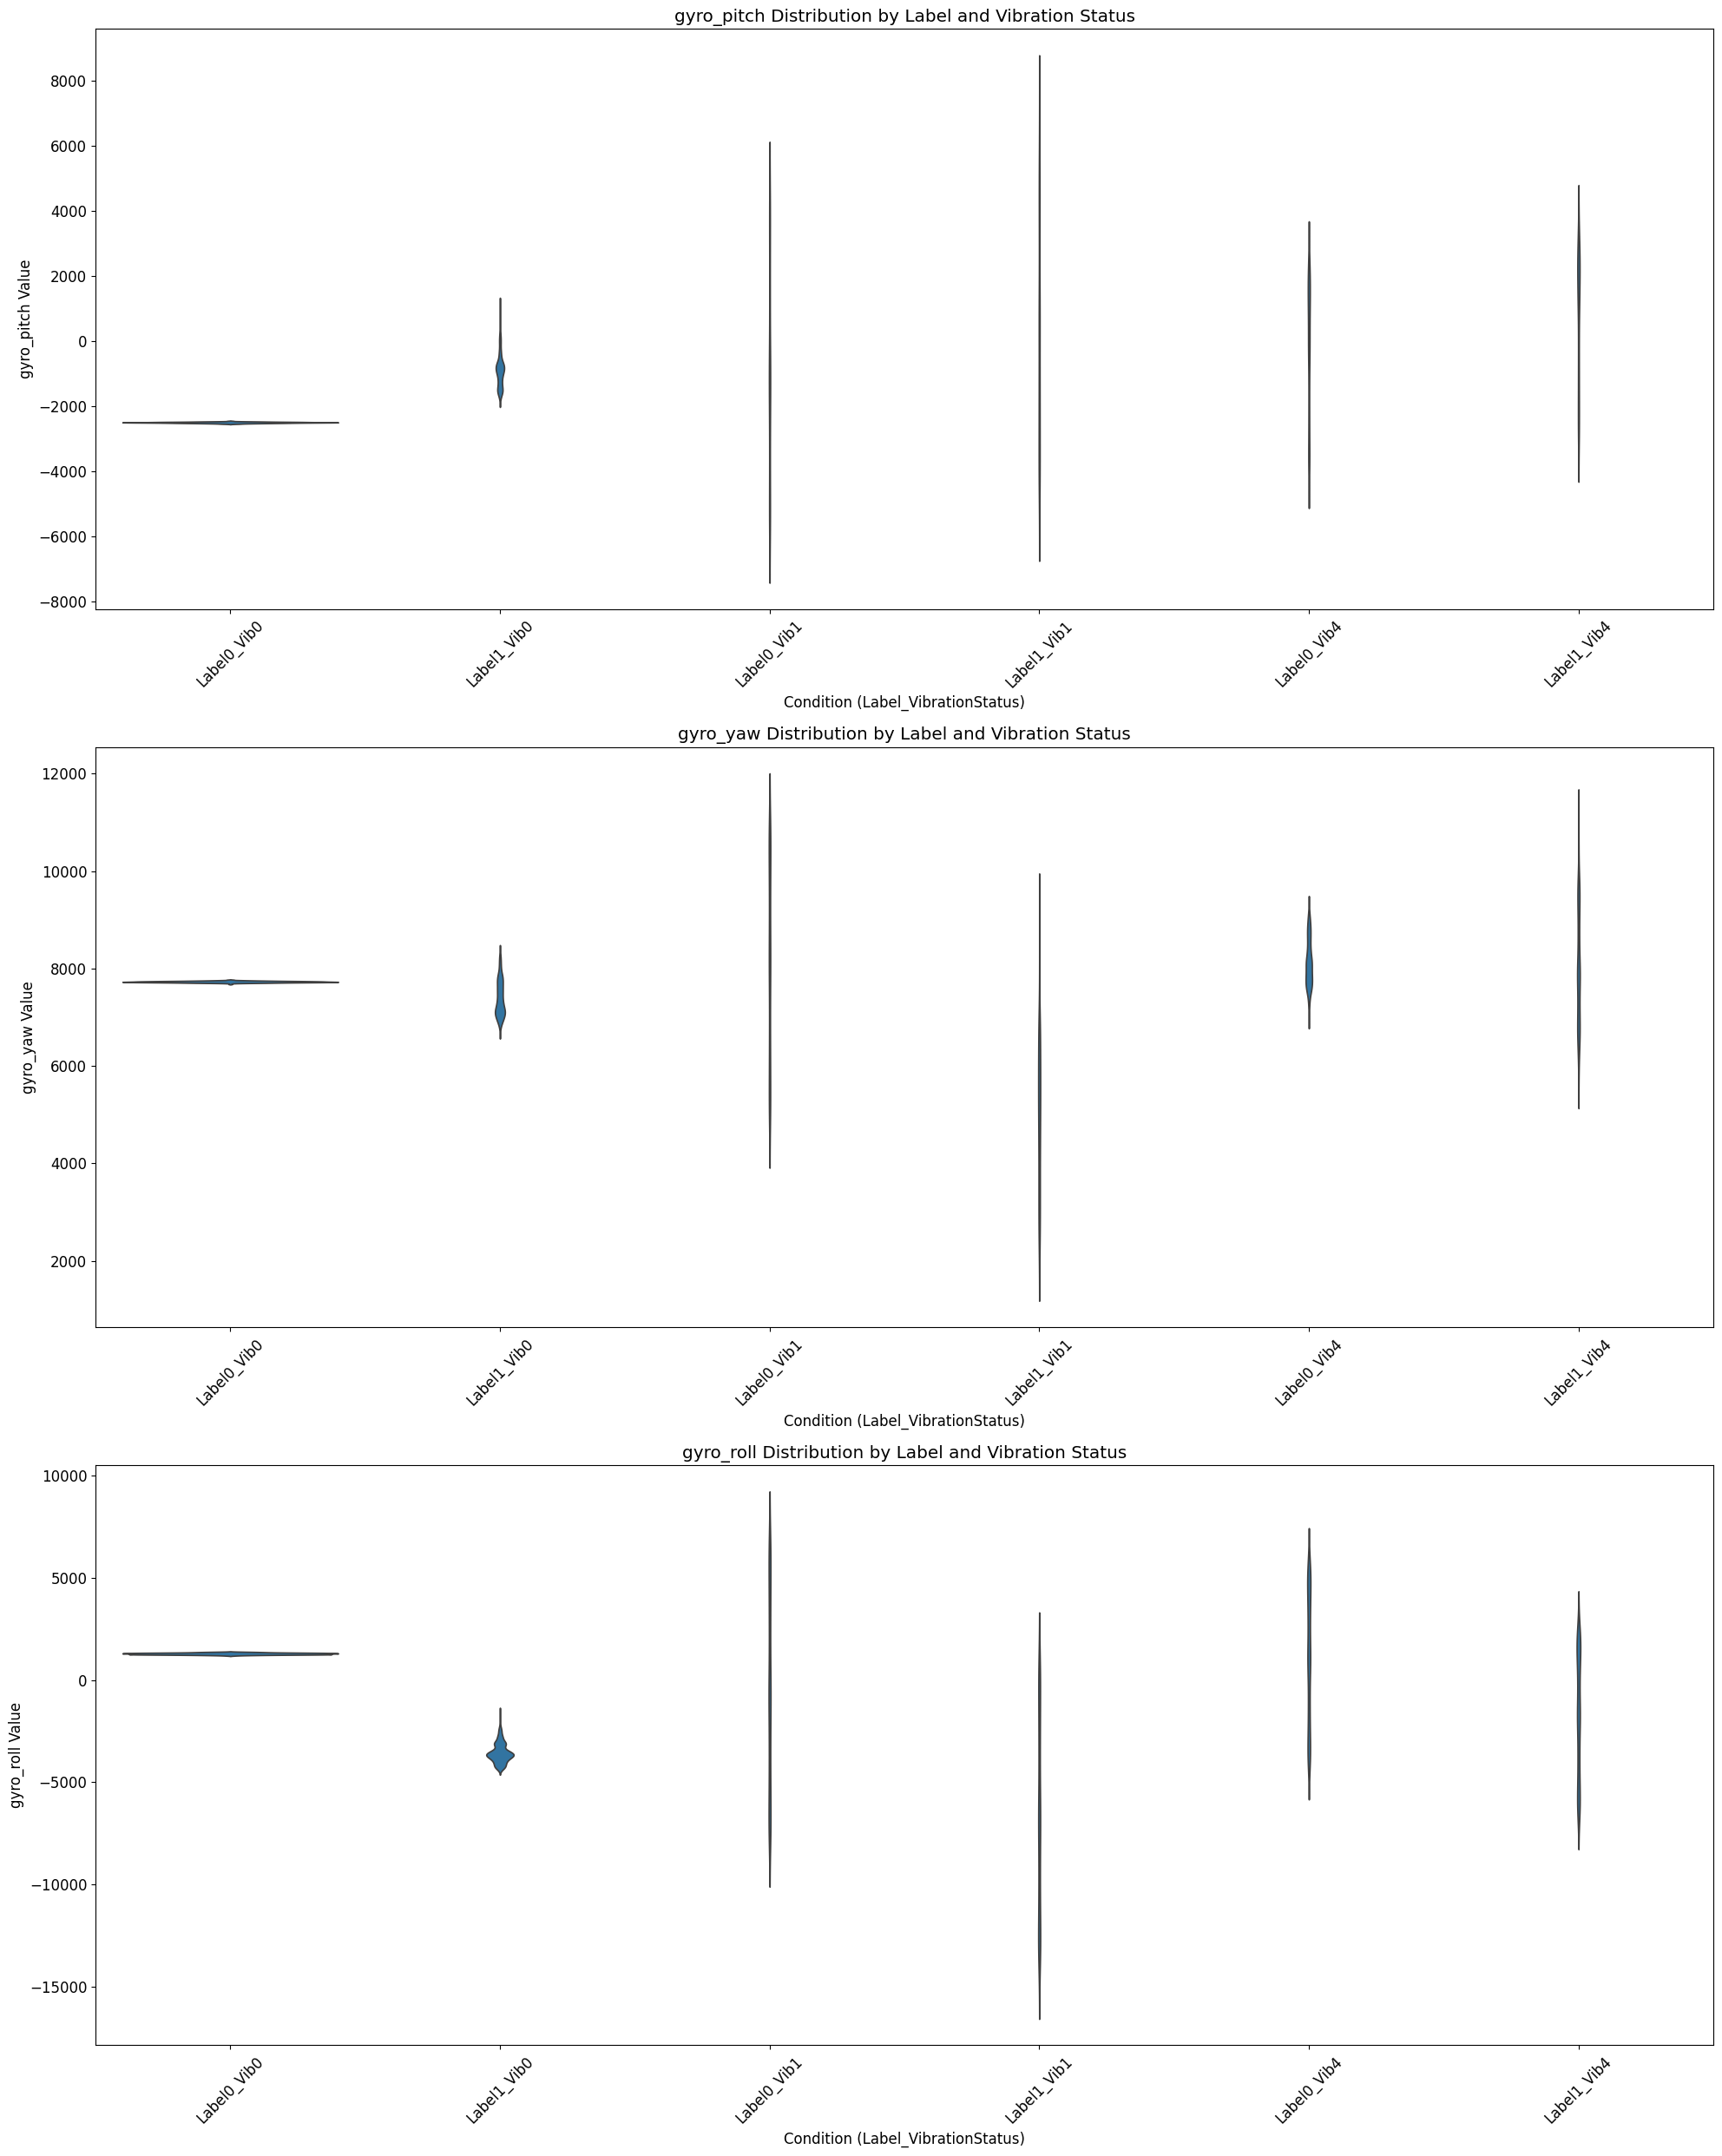


Statistical Summary for each condition:

acc_x statistics:
                           mean         std  min  max
label vibration_status                               
0     0                   2.254    1.239767    0    6
      1                   3.189   60.458751  -90  100
      4                   3.261    8.650648  -23   22
1     0                 174.890  135.298165 -149  525
      1                 -55.164  228.895851 -662  355
      4                  50.026  204.035658 -595  515

acc_y statistics:
                          mean         std  min  max
label vibration_status                              
0     0                  2.055    1.371808   -1    6
      1                  2.856  192.406038 -332  247
      4                 -7.641  108.991988 -187  180
1     0                 37.567  207.210598 -262  765
      1                -75.936  199.662839 -661  297
      4                 37.668  170.271637 -585  430

acc_z statistics:
                           mean         std  m

<Figure size 2000x1500 with 0 Axes>

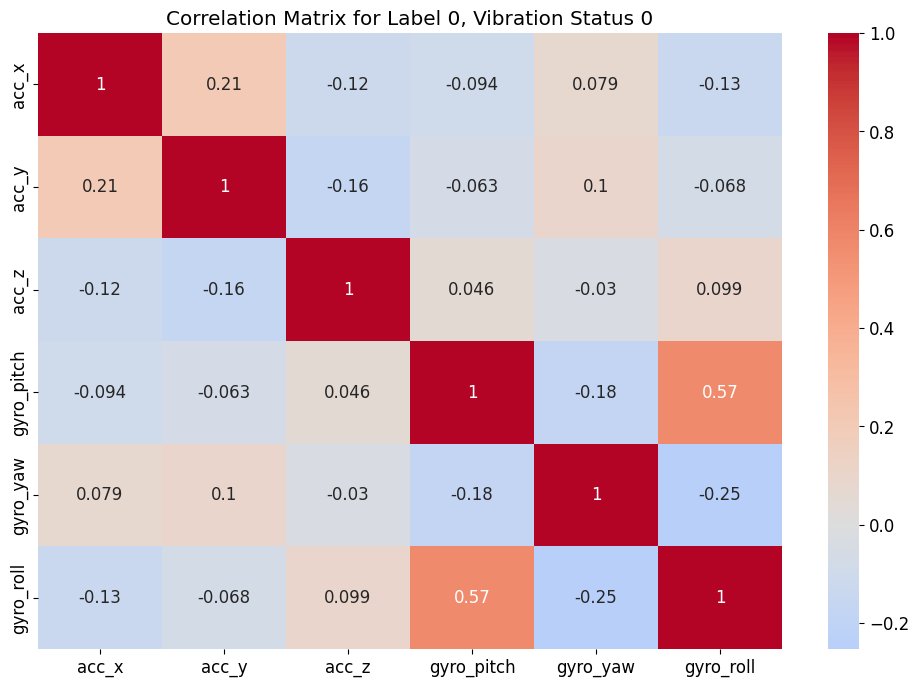

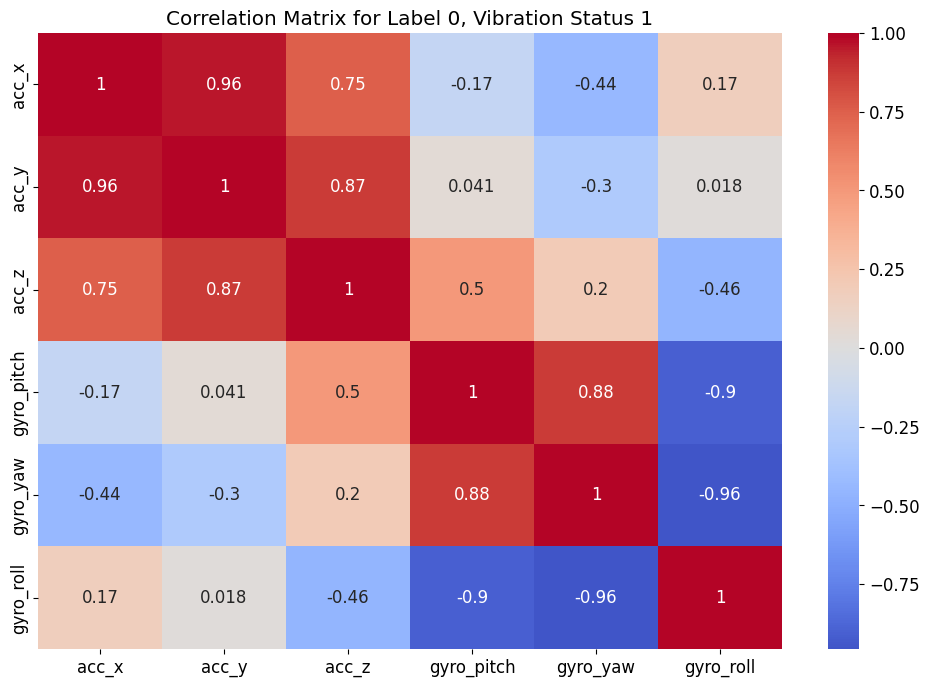

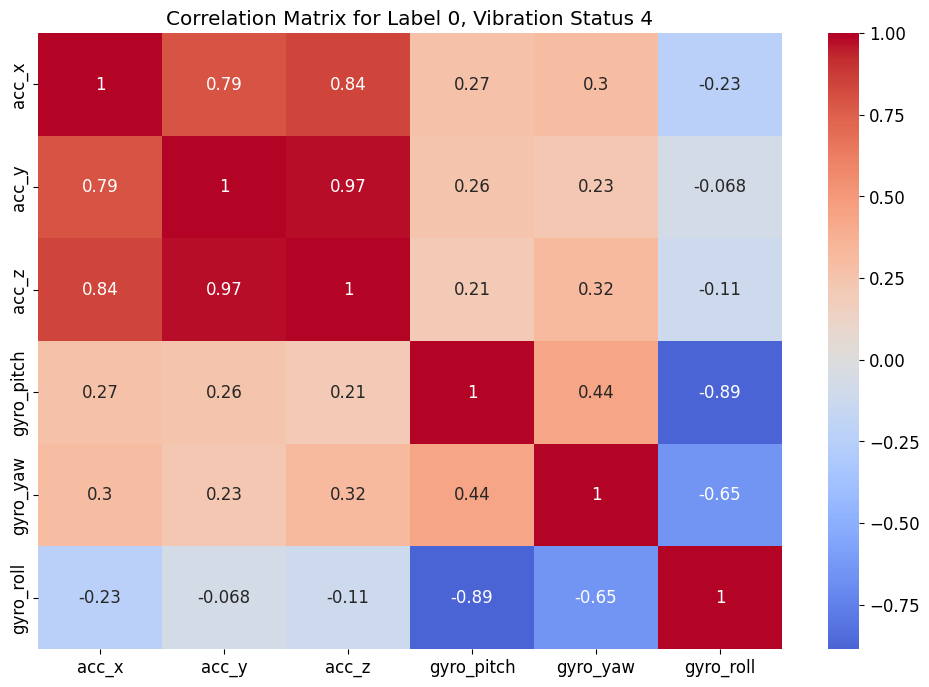

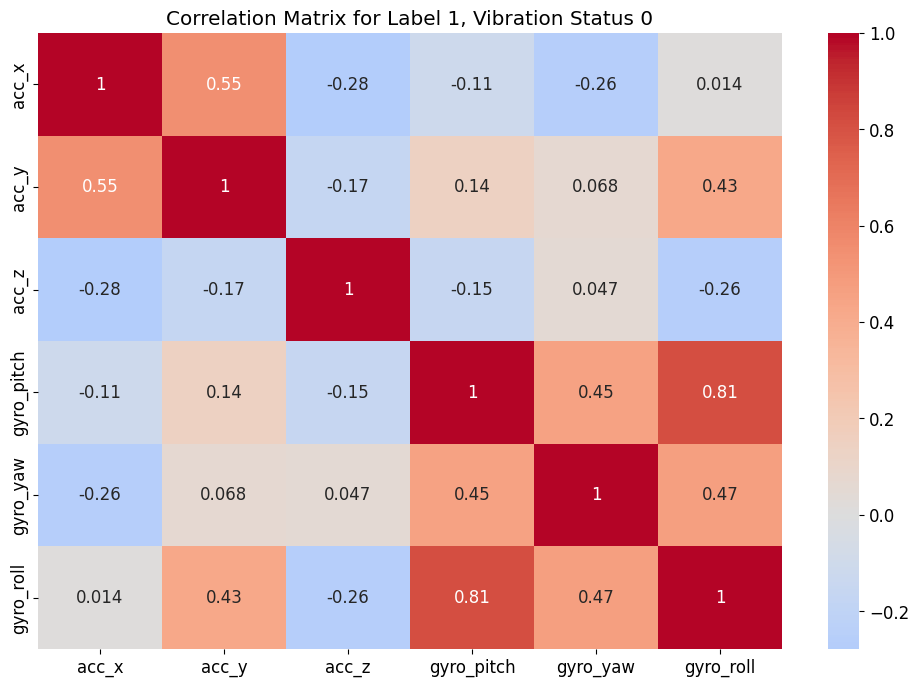

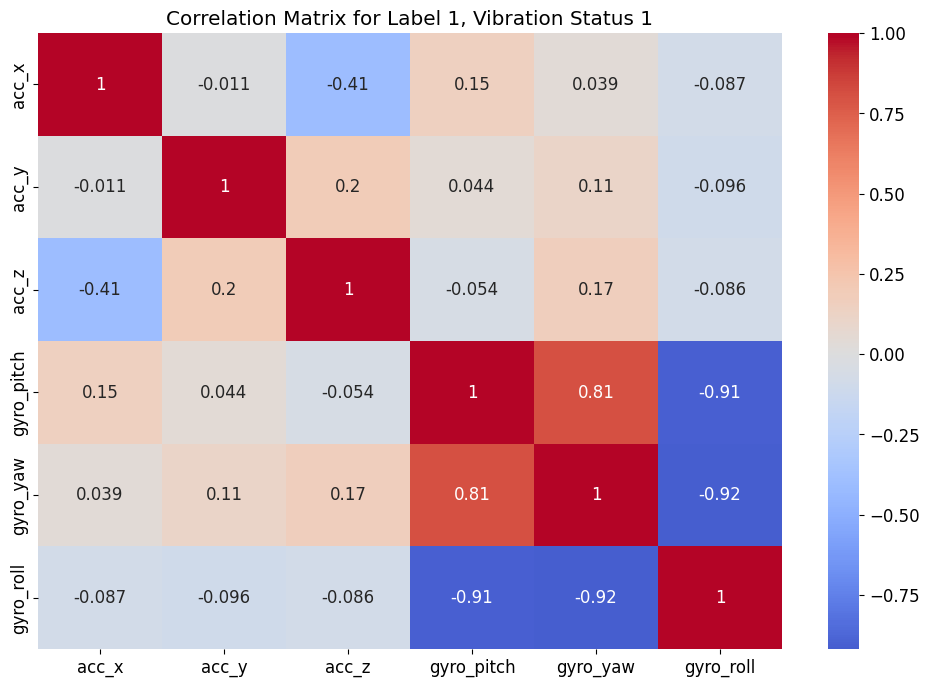

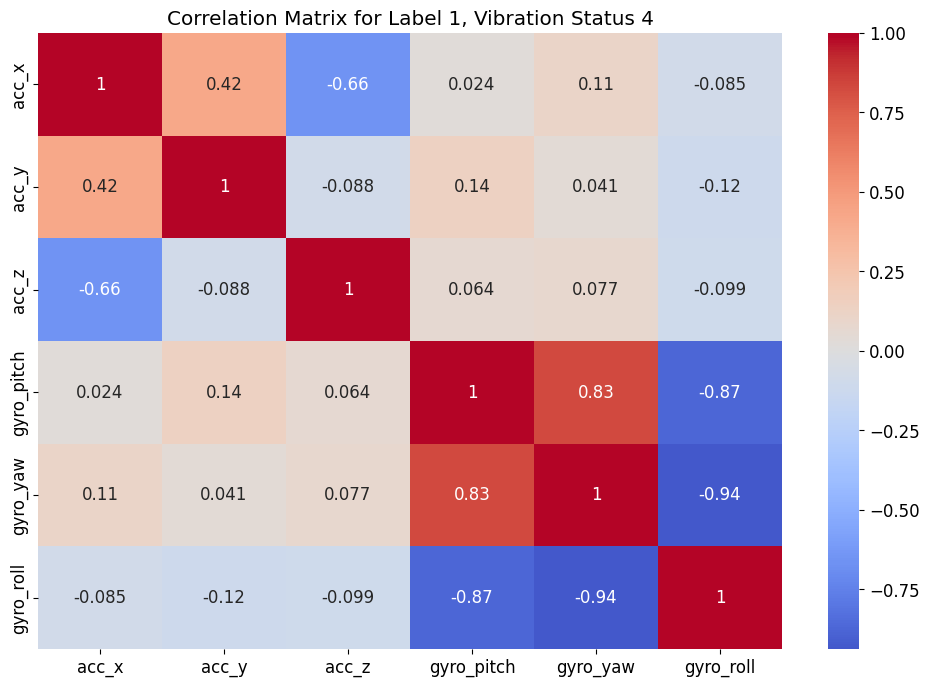

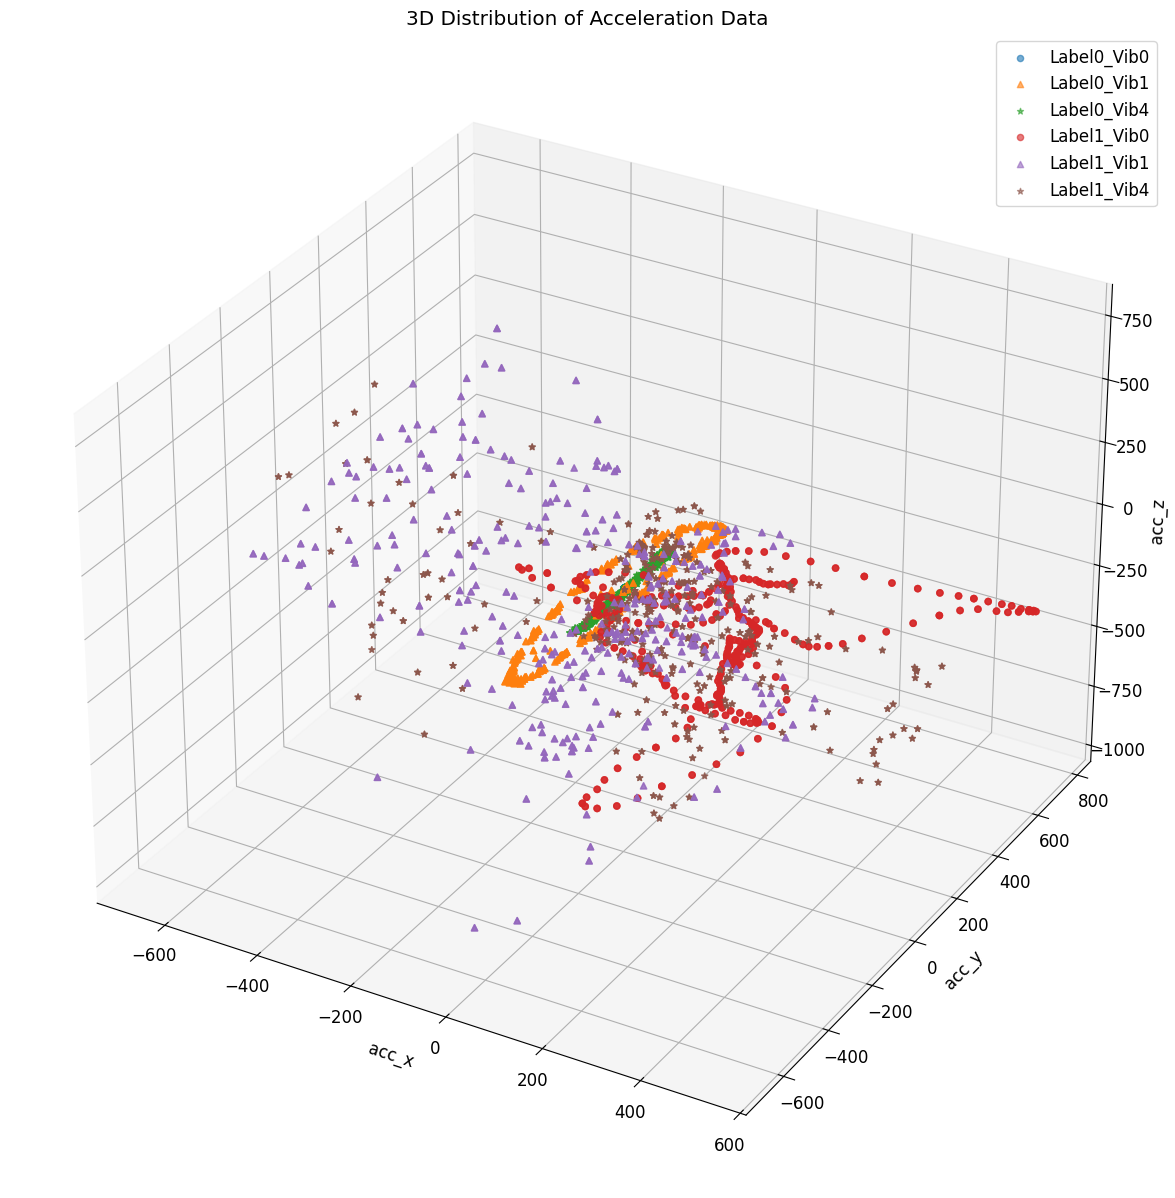

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and figure parameters
plt.style.use('default')
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 12

# Create condition labels for better readability
data['condition'] = data.apply(lambda x: f'Label{x.label}_Vib{x.vibration_status}', axis=1)

# 1. Violin plots for acceleration data
fig, axes = plt.subplots(3, 1, figsize=(20, 25))

# Plot acceleration data
for idx, sensor in enumerate(['acc_x', 'acc_y', 'acc_z']):
    sns.violinplot(data=data, x='condition', y=sensor, ax=axes[idx])
    axes[idx].set_title(f'{sensor} Distribution by Label and Vibration Status')
    axes[idx].set_xlabel('Condition (Label_VibrationStatus)')
    axes[idx].set_ylabel(f'{sensor} Value')
    # Rotate x-labels for better readability
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Violin plots for gyroscope data
fig, axes = plt.subplots(3, 1, figsize=(20, 25))

# Plot gyroscope data
for idx, sensor in enumerate(['gyro_pitch', 'gyro_yaw', 'gyro_roll']):
    sns.violinplot(data=data, x='condition', y=sensor, ax=axes[idx], inner=None)
    axes[idx].set_title(f'{sensor} Distribution by Label and Vibration Status')
    axes[idx].set_xlabel('Condition (Label_VibrationStatus)')
    axes[idx].set_ylabel(f'{sensor} Value')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Create a more detailed statistical summary
print("\nStatistical Summary for each condition:")
for sensor in ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']:
    print(f"\n{sensor} statistics:")
    stats = data.groupby(['label', 'vibration_status'])[sensor].agg(['mean', 'std', 'min', 'max'])
    print(stats)

# 4. Create a pairplot for one specific condition to show relationships between sensors
plt.figure(figsize=(20, 15))
for label in [0, 1]:
    for vib in [0, 1, 2, 3,4]:
        condition_data = data[(data['label'] == label) & (data['vibration_status'] == vib)]
        
        if len(condition_data) > 0:  # Check if we have data for this condition
            plt.figure(figsize=(12, 8))
            sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_pitch', 'gyro_yaw', 'gyro_roll']
            correlation = condition_data[sensor_cols].corr()
            
            sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
            plt.title(f'Correlation Matrix for Label {label}, Vibration Status {vib}')
            plt.show()

# 5. Create a 3D scatter plot for acceleration data
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Create different markers and colors for each condition
markers = ['o', '^', 's', 'D','*']
colors = ['b', 'r', 'g', 'y','m']

for label in [0, 1]:
    for vib in [0, 1, 2, 3,4]:
        condition_data = data[(data['label'] == label) & (data['vibration_status'] == vib)]
        if len(condition_data) > 0:
            # Sample a subset of points to avoid overcrowding
            sample_size = min(1000, len(condition_data))
            sampled_data = condition_data.sample(n=sample_size)
            
            ax.scatter(sampled_data['acc_x'], 
                      sampled_data['acc_y'], 
                      sampled_data['acc_z'],
                      label=f'Label{label}_Vib{vib}',
                      marker=markers[vib],
                      alpha=0.6)

ax.set_xlabel('acc_x')
ax.set_ylabel('acc_y')
ax.set_zlabel('acc_z')
ax.set_title('3D Distribution of Acceleration Data')
ax.legend()
plt.show()